## Step - 1: Business Problem Understanding
- Identify the relationship between total advertising spend and sales?
- Our next ad campaign will have a total spend of $200, 000, how many units do we expect to see as a result of this?

----> Business problem requirement (project requirement) --> provide analysis based on business

----> for cleaning data business understanding are very important


----> Whatever the observations you will get that basically means **Data Analysis**

>
## DATA SCIENCE PROJECT PHASE;
1. Development
from starting to model
2. Operation
future (new) data
- (update the latest data, clean & submit to the machine)
3. Support

>

### data understanding steps:
- columns check --> continuous/ categorical
- data types check
- regression/ classification
- write columns name (continuous / discrete)
- apply .tolist() to the columns

## Step - 2 Data Understanding (EDA)
----> Data understanding - EDA

#### Data
This sample data displays sales for a particular product as a function of advertising budgets (in dollars) for TV, radio, and newspaper media.

#### Independent variable
- TV: Adevertising dollars spent on TV for a single product in a given market (in dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper.

#### Target variable:
- Sales: sales of a single producr in a given market

>

- Collect & Load Data
- Dataset Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


## Step - 3 Data Preprocessing
- by combining all the features, we get the 'total spend'

----> If column category is same so, you can drop that column (If any column having constant category so you can drop).

----> Based on business create new column and drop remaining columns that are not required.

----> Cleaning will be done one time and apply model multiple time.

----> When you will present your work so never explain step by step process to the client. (never show your code, show analysis visually)

In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [6]:
df.drop(columns=['TV', 'radio', 'newspaper'], inplace=True)
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


#### Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


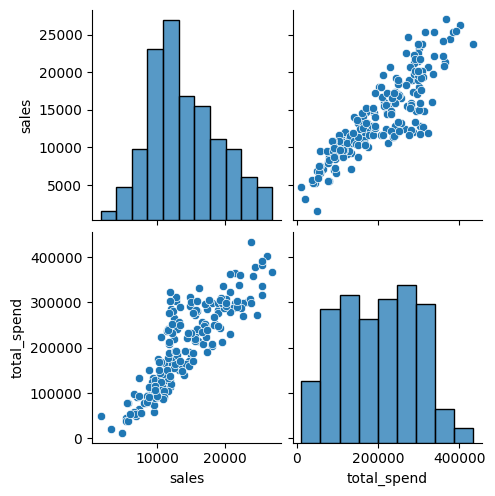

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


----> 
----
>
- Till EDA --> data analysis / data understanding
- Data understanding used only on raw data
- Till corr(), we have raw data 

Data cleaning + encoding --> for data preparation

In data preparation and data preprocessing stage 

1.	Data cleaning (Mandatory)

2.	Encoding (Mandatory)
>Fit calculate only on numbers that’s why we do encoding

3.	Scaling (not mandatory)
>Scaling brings all number at same magnitude

- Feature high magnitude 
- Column with big numbers --> (this statement is a common english word, don’t speak this for interview)
- Some input feature with high magnitude & some input features with low magnitude in that case we will use scaling.

4.	Transformation (not mandatory)

Whatever data you provide to the machine, it’ll give relation but answer will be worst. (accuracy low)

So, in order to avoid low accuracy, we need to remove outliers

Fit: you are required to do data cleaning apart from outliers & encoding or else, you will get an error.

In some cases, outliers are important and we will try our data cleaning with or without outliers & we will check the result.


#### Data Cleaning

In [10]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

#### Data Wrangling

In [11]:
# no encoding is required here because no categorical data is given

#### creating x and y for training and testing

In [12]:
X = df[['total_spend']]
y = df['sales']

## Step - 4: Modeling

### findout the best random_state value 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Train = []
Test = []
CV = []

for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    ypred_train = model.predict(X_train)
    ypred_test = model.predict(X_test)

    Train.append(model.score(X_train, y_train))
    Test.append(model.score(X_test, y_test))
    CV.append(cross_val_score(model, X_train, y_train, cv=5).mean())
    
em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test']) <= 0.05) & (abs(em['Test']-em['CV']) <=0.05)]
print('best random state number:', gm[gm['Test']==gm['Test'].max()].index.to_list())

best random state number: [54]


# <font color = aqua> MLR </font> 

### Build a model

##### NOTE:
Remember, you have to made your model in a way so it can predict for the future data.

you need to check for the future data how it will work

because after you will build your model, client will have some data for testing your model 

(client data --> testing data)

fit is applicable only on training data.

In [14]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=54)

In [15]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

# Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluation
from sklearn.metrics import r2_score
print('Train R2:', model.score(X_train, y_train))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:', cross_val_score(model, X_train, y_train, cv=5).mean())
print('Test R2:', r2_score(y_test, ypred_test))

Intercept: 4211.8938155785545
Coefficient: [0.04923301]
Train R2: 0.7449667662402499
Cross Validation Score: 0.7395892032785966
Test R2: 0.7833188278305669


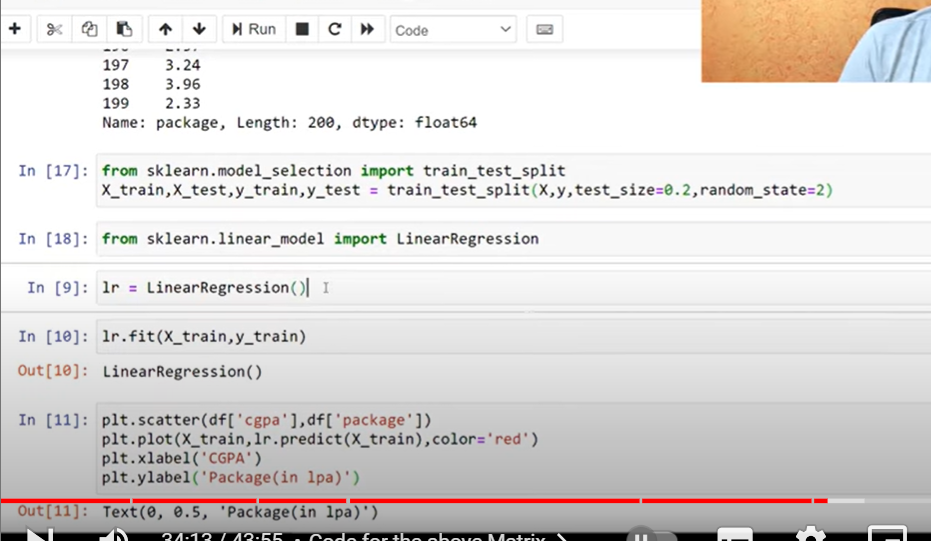

#### manually predictions
- Intercept: 4211.8938155785545
- Coefficient: [0.04923301]

sales = 4211.8 + (0.0492 * x)
*X_test values are 193200, 77100, 238000, 57700...............*
- 4211.8 + (0.0492 * 193200) =
- 4211.8 + (0.0492 * 77100) =

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors.

In [16]:
from sklearn.metrics import mean_absolute_error
print('Test MAE:', mean_absolute_error(y_test, ypred_test))

Test MAE: 1759.8909895860015


**Mean Square Error** (MSE) is the mean of the squared errors:

In [17]:
from sklearn.metrics import mean_squared_error
print('Test MSE:', mean_squared_error(y_test,ypred_test))

Test MSE: 5655914.879523322


**Root Mean Square Error** (RMSE) is the square root of the mean of the squared errors:

In [19]:
print('Test RMSE:', np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 2378.216743596622


## Model Selection

#### Checklist 1: Check whether model is good or either having overfitting/ underfitting problem
**(test accuracy == train accuracy)**

#### Checklist 2: Whether the Train Accuracy = Cross Validation Score

----> Train R2 = 0.744 (74.4%)

----> CV = 0.739 (73.9%)

***the difference between train and cv should be +/- 5%***
- consider both almost same
- if the difference increase so that's a bad model.
- and if model is bad so again you will have to start you process from the starting and may be you need to change your algorithm

### ==>> After evaluation on training data now your model is ready so you predicted on the test data

#### Checklist 3: Check whether, it satisifies the Business Problem Requirements or not

----> Train R2: 0.744 (74.4%)

----> Test R2 0.783 (78.3%)

>

as we can see clearly **train accuracy is low** < **test accuracy is high**

### Here, we can see clearly this is the best model because the difference between both train and test accuracy is between 0.05% 

#### Checklist 4: (only for linear Regression) : Check for Assumptions

#### 1. Linearity of Errors

In [19]:
error = y_test - ypred_test

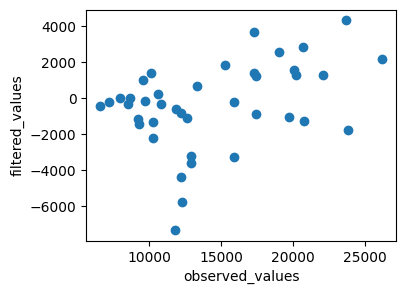

In [20]:
plt.figure(figsize=(4, 3))
plt.scatter(y_test, error)
plt.xlabel('observed_values')
plt.ylabel('filtered_values')
plt.show()

#### 2. Normality of Errors

In [21]:
error.skew()

-0.6980267055281112

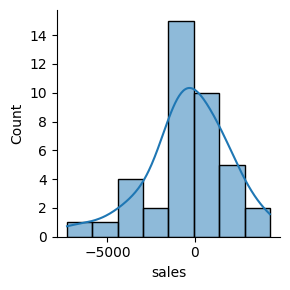

In [22]:
sns.displot(error, kde=True, height=3)
plt.show()

#### Equal Variance of Errors (Homoscedasticity)

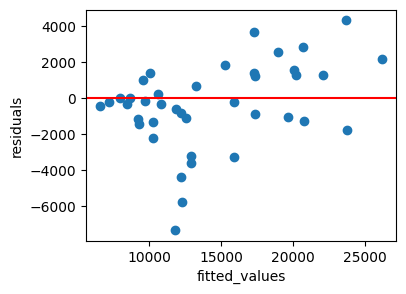

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.scatter(y_test, error)
plt.axhline(y=0, color='red')
plt.xlabel('fitted_values')
plt.ylabel('residuals')
plt.show()

#### 4. Variables Significance

This line creates an OLS regression model using the formula 'y~X'. In regression notation, y~X means that you are modeling the relationship between the dependent variable y and the independent variable(s) X. The formula essentially specifies the linear regression equation.

- y: The dependent variable (response variable).
- X: The independent variable(s) (predictor variable(s)).

In [24]:
import statsmodels.formula.api as smf
model= smf.ols('y_train ~ X_train', data=X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     461.5
Date:                Fri, 02 Feb 2024   Prob (F-statistic):           9.68e-49
Time:                        09:41:52   Log-Likelihood:                -1487.5
No. Observations:                 160   AIC:                             2979.
Df Residuals:                     158   BIC:                             2985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4211.8938    499.193      8.437      0.000    3225.943    5197.845
X_train        0.0492      0.002     21.483      0.000       0.045       0.054
==============================================================================
Omnibus:                        5.546   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.114
Skew:                          -0.382   Prob(JB):                       0.0775
Kurtosis:                       3.430   Cond. No.                     5.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This line prints a summary of the OLS regression results. The summary includes various statistics and information about the model, such as coefficients, standard errors, t-values, p-values, and more. It's a comprehensive overview of the regression analysis.

## Final Model

In [25]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = df[['total_spend']]
y = df['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=54)
model.fit(X_train, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


# Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)


# Evaluation
print('Train R2:', model.score(X_train, y_train))
print('Train R2:', r2_score(y_train, ypred_train))

print('Cross Validation Score:', cross_val_score(model, X, y, cv=5).mean())
print('Test R2:', model.score(X_test, y_test))

Intercept: 4211.8938155785545
Coefficients: [0.04923301]
Train R2: 0.7449667662402499
Train R2: 0.7449667662402499
Cross Validation Score: 0.7433783178555419
Test R2: 0.7833188278305669


Sales = 0.04923301(totalspend) + 4211.8938155785545

#### Interpreting the coefficients

- A **1 unit increase in total Spend** is associated with an **increase of 0.0492 units in sales**.
- This basically means that for every $10000 dollars spend on Ads, we could expect 492 more units sold.

>
## Future Data (Prediction)
For the future data don't predict directly firstly perform data preprocessing then after that predict on the future data.

perform data preprocessing for the future data

#### Use the model to make predictions on a new value. For a total spend of 200k on Ads, how many units could we expect to be sold?

future data, we will convert into dataframe then we will predict

In [27]:
new_data = pd.DataFrame({'total_spend':[200000]})
new_data

,total_spend
0,200000


In [28]:
model.predict(new_data)

array([14058.49569096])

In [29]:
Sales = (0.04923301 * 200000) + 4211.8938155785545
Sales

14058.495815578555

whatever is the accuracy above mentioned in Test R^2 (0.7742) that would be the accuracy for the future data.

Means if we spend 200000 so 13953 units will be sold with 77.4% acuracy 
>

## Save a Model

##### saving model dependent on the deployment team (whether save using joblib or pickle)

'wb' - writing mode

In [30]:
from joblib import dump
dump(model, 'sales_model.joblib')

['sales_model.joblib']

- Flask (__name__), it will create an empty website
- render template, it will run html file
>